In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# /content/drive/MyDrive/Dataset/dataset.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/dataset.csv")
df  = df.drop("Unnamed: 0",axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
print("Total Number of Outliers for each column \n",((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum())

print("Total Number of outliers : ",((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum().sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


Total Number of Outliers for each column 
 airline                0
arrival_time           0
class                  0
days_left              0
departure_time         0
destination_city       0
duration            2110
flight                 0
price                123
source_city            0
stops                  0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


Total Number of outliers :  2233


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


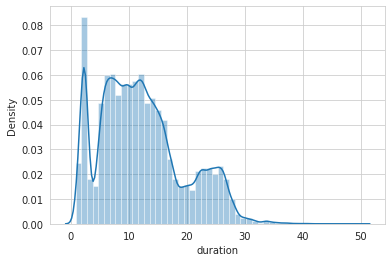

In [ ]:
sns.distplot(df['duration'])


In [ ]:
print("Total number of rows in our dataset : ",df.count()["airline"])
print("Total number of columns in our dataset : ",len(df.axes[1]))

Total number of rows in our dataset :  300153
Total number of columns in our dataset :  11


In [ ]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

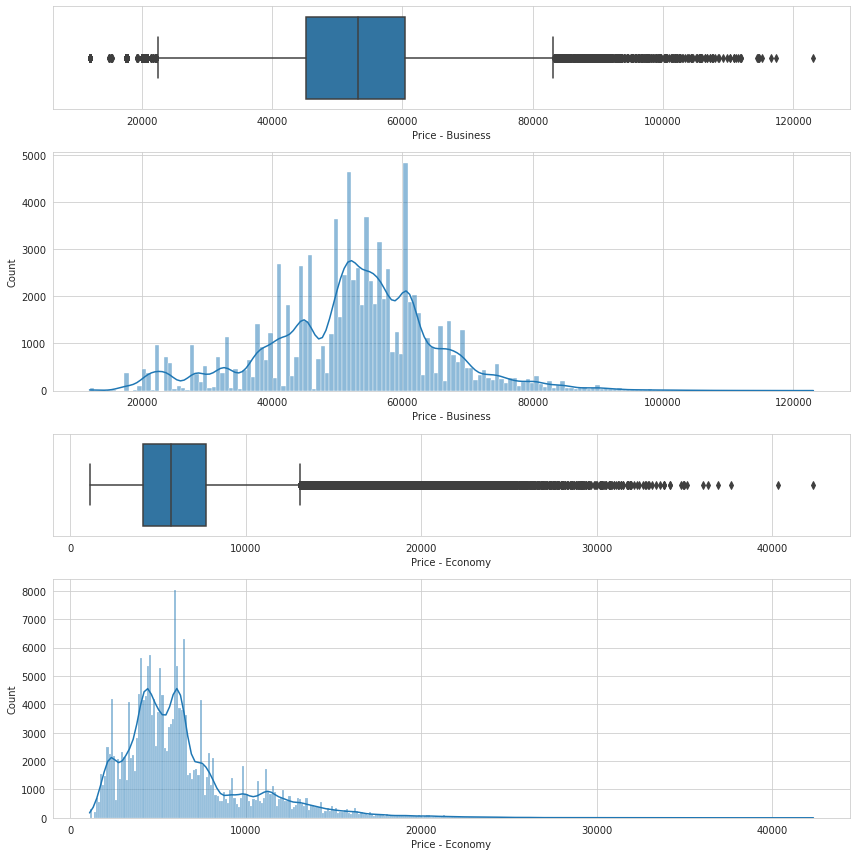

In [ ]:
fig = plt.figure(figsize=(12, 12)) 
gs = gridspec.GridSpec(4, 1, height_ratios=[3, 7, 3, 7]) 

ax0 = plt.subplot(gs[0])
price_boxplot = sns.boxplot(x='price', data = df.loc[df['class'] == 'Business'])
price_boxplot.set(xlabel='Price - Business')

ax1 = plt.subplot(gs[1])
price_hgram = sns.histplot(x = 'price', data = df.loc[df['class'] == 'Business'], kde = True)
price_hgram.set(xlabel='Price - Business')

ax2 = plt.subplot(gs[2])
price_boxplot = sns.boxplot(x='price', data = df.loc[df['class'] == 'Economy'])
price_boxplot.set(xlabel='Price - Economy')

ax3 = plt.subplot(gs[3])
price_hgram = sns.histplot(x = 'price', data = df.loc[df['class'] == 'Economy'], kde = True)
price_hgram.set(xlabel='Price - Economy')

plt.tight_layout()

**Insights**

We can understand from the visualisations that the average price of a business class ticket is approximately 55000 and the average price of a ticket in the economy is 6500.

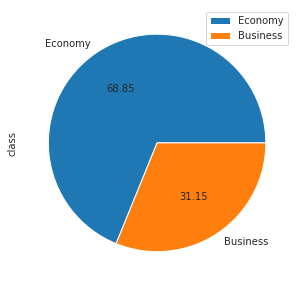

In [ ]:
plt.figure(figsize = (8,5))
df['class'].value_counts().plot(kind = 'pie', autopct = "%.2f")
plt.legend(['Economy','Business'])
plt.show()

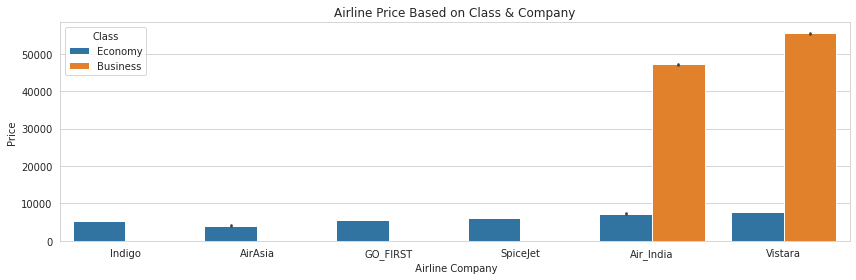

In [ ]:
plt.figure(figsize=(12, 4))

dual_bar = sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price"))
dual_bar.set_title('Airline Price Based on Class & Company')
dual_bar.set(xlabel=" Airline Company", ylabel="Price")
dual_bar.legend(title="Class")

plt.tight_layout()

**Insights**

Business Class tickets are only available in Air India and Vistara. Both companies charge a 400% premium for their business class tickets. According to the visualisation Air Asia has the cheapest tickets whereas Vistara and Air India charge the most with Vistara being slightly more expensive than Air India.

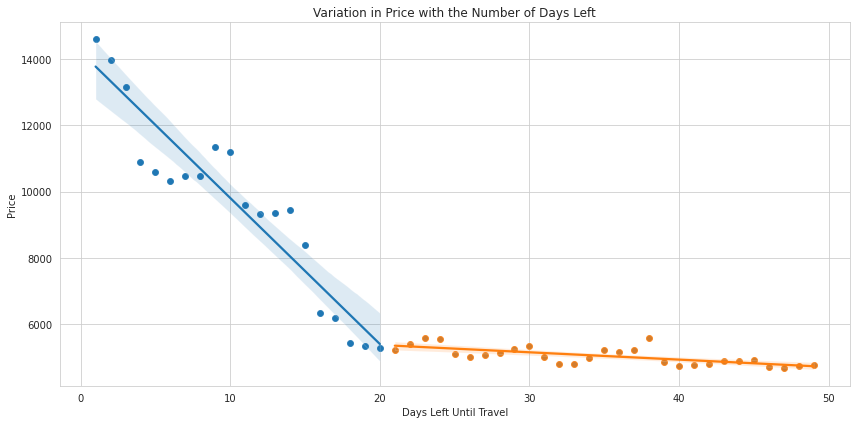

In [ ]:
df_temp = df.loc[df['class'] == 'Economy']
df_temp = df_temp.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(12,6))

plot = sns.scatterplot(x="days_left", y="price", data=df_temp)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>=1)&(df_temp["days_left"]<21)].days_left, y=df_temp.loc[(df_temp["days_left"]>=1)&(df_temp["days_left"]<21)].price, fit_reg=True, ax=plot)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=21].days_left, y=df_temp.loc[df_temp["days_left"]>=21].price, fit_reg=True, ax=plot)

plot.set_title("Variation in Price with the Number of Days Left")
plot.set(xlabel = "Days Left Until Travel", ylabel = "Price")

plt.tight_layout()

**Insights**

The above visualisation is based on fare prices of the **Economy Class**. 

There is slow rise in the prices in the first 30 days of issue of tickets. There is no or very less difference between the price of a ticket bought on the first day of issue and the price of a ticket bought after 30 days of issue.

Once we hit the 30 day mark, there is a extreme rise in prices. A week before the trip, there is a small dip in prices. This could be looked at as a desperate attempt at filling empty seats by the airline companies. In the last two days there is big jump in the prices and the price is equal to almost three times the price the ticket was issued at.

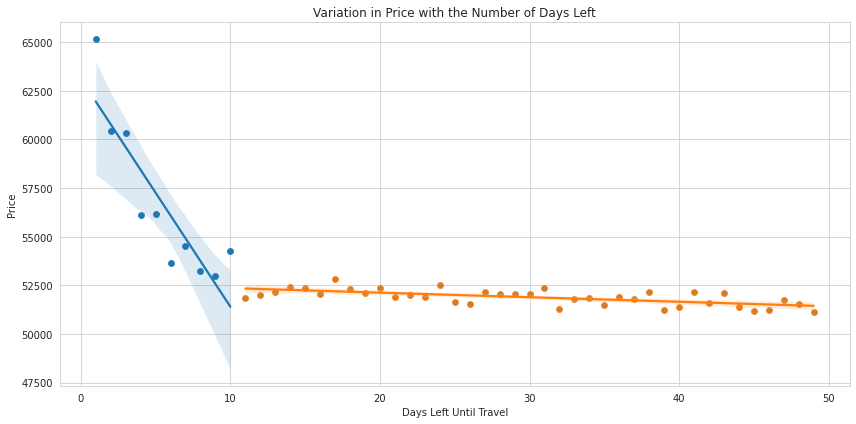

In [ ]:
df_temp = df.loc[df['class'] == 'Business']
df_temp = df_temp.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(12,6))

plot = sns.scatterplot(x="days_left", y="price", data=df_temp)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>=1)&(df_temp["days_left"]<11)].days_left, y=df_temp.loc[(df_temp["days_left"]>=1)&(df_temp["days_left"]<11)].price, fit_reg=True, ax=plot)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=11].days_left, y=df_temp.loc[df_temp["days_left"]>=11].price, fit_reg=True, ax=plot)

plot.set_title("Variation in Price with the Number of Days Left")
plot.set(xlabel = "Days Left Until Travel", ylabel = "Price")

plt.tight_layout()

**Insights**

The above visualisation is based on fare prices of the **Business Class**. 

There is a small hike in the price observed in the first 40 days of the ticket being issued. Once 40 days are over there is a steep rise can be observed in the prices of the tickets. There is a 20% gain in the price of tickets when bought a day before the trip.

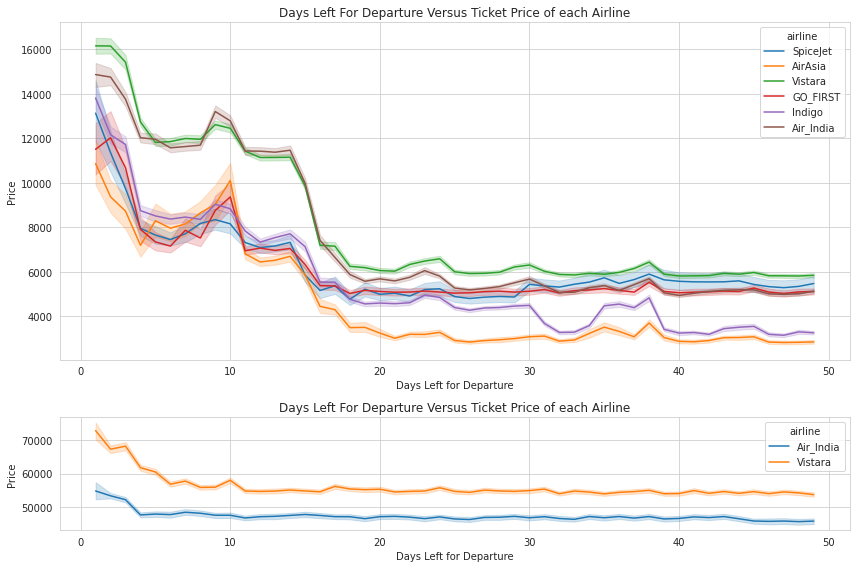

In [ ]:
df_eco = df.loc[df['class'] == 'Economy']
df_bus = df.loc[df['class'] == 'Business']

fig = plt.figure(figsize=(12, 8)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 

ax0 = plt.subplot(gs[0])
plot = sns.lineplot(data=df_eco, x='days_left', y='price' ,hue='airline')
plot.set_title('Days Left For Departure Versus Ticket Price of each Airline')
plot.set(xlabel = "Days Left for Departure", ylabel = "Price")

ax1 = plt.subplot(gs[1])
plot = sns.lineplot(data=df_bus, x='days_left', y='price' ,hue='airline')
plot.set_title('Days Left For Departure Versus Ticket Price of each Airline')
plot.set(xlabel = "Days Left for Departure", ylabel = "Price")

plt.tight_layout()

**Insights**

**Visualisation to realise how each Airline company varies its Prices with respect to the number of days for departure.** 

All airlines vary their prices in a similar manner. From our previous visulisations we already know that Vistara and Air India flights are prices higher than the rest. One day before departure, Indigo, Spicejet and Air India 
tickets are priced more or less in the same way.

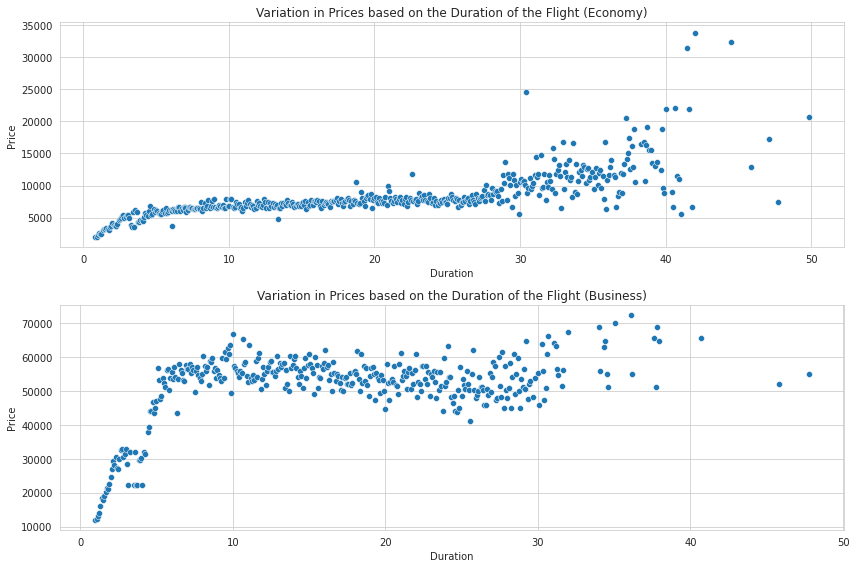

In [ ]:
df_eco = df.loc[df['class'] == 'Economy']
df_eco = df_eco.groupby(['duration'])['price'].mean().reset_index()

df_bus = df.loc[df['class'] == 'Business']
df_bus = df_bus.groupby(['duration'])['price'].mean().reset_index()

fig = plt.figure(figsize=(12, 8)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1,1]) 

ax0 = plt.subplot(gs[0])
plot = sns.scatterplot(x="duration", y="price", data=df_eco)
plot.set_title("Variation in Prices based on the Duration of the Flight (Economy)")
plot.set(xlabel = "Duration", ylabel = "Price")

ax1 = plt.subplot(gs[1])
plot = sns.scatterplot(x="duration", y="price", data=df_bus)
plot.set_title("Variation in Prices based on the Duration of the Flight (Business)")
plot.set(xlabel = "Duration", ylabel = "Price")

plt.tight_layout()

**Insights**

**Variation of Economy and Business Class Tickets based on the Duration of the Flight** 

In the economy class, the prices of the tickets do not get affected by the duration of the flight. The price are approximately 7500 for flights with a duration between 7 to 28 hours. 

In the business class, the prices keep increasing with the increase in duration of the flight until 6 hours. If the flights duration is between 10 to 30 hours the prices range from 50000 to 60000.

Text(0.5, 0.98, 'Variation in Prices based on Source and Destination')

<Figure size 1440x432 with 0 Axes>

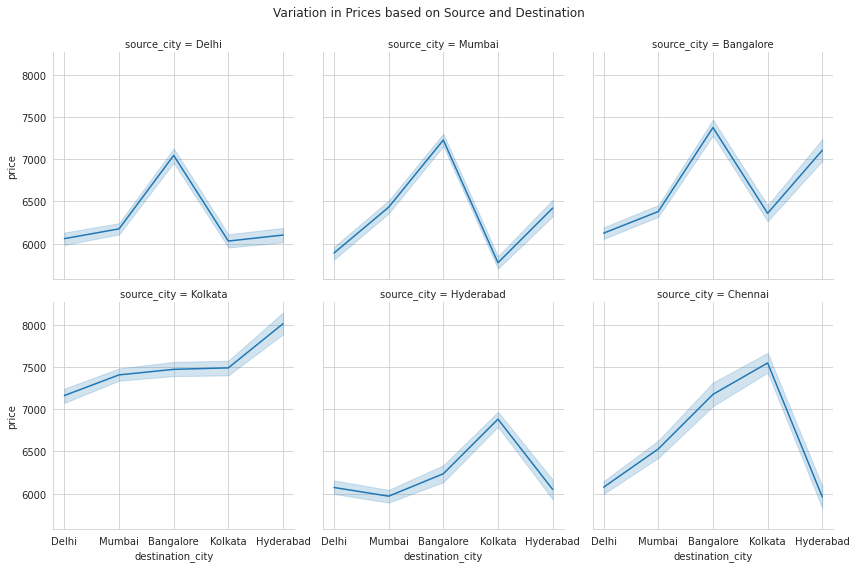

In [ ]:
fig = plt.figure(figsize=(20, 6)) 

df_eco = df.loc[df['class'] == 'Economy']

plot = sns.relplot(col="source_city", y="price", kind="line", x='destination_city', data=df_eco, col_wrap=3, height = 4, aspect = 1)
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle('Variation in Prices based on Source and Destination')

# plt.tight_layout()

**Insights**

**Variation in Prices based on Source and Destination** 

Looking at the relation plot, we can say that tickets in the economy class for flights departing from Kolkata are priced higher and tickets in the economy class for flights departing from Delhi are the cheapest when compared to flights departing from other cities.

Text(0.5, 0.98, 'Variation in Prices based on Source and Destination')

<Figure size 1440x432 with 0 Axes>

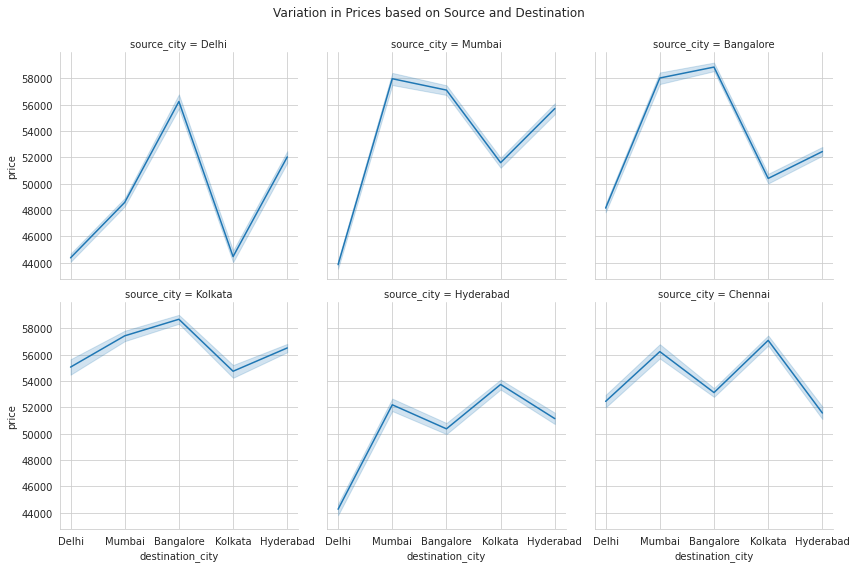

In [ ]:
fig = plt.figure(figsize=(20, 6)) 

df_eco = df.loc[df['class'] == 'Business']

plot = sns.relplot(col="source_city", y="price", kind="line", x='destination_city', data=df_eco, col_wrap=3, height = 4, aspect = 1)
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle('Variation in Prices based on Source and Destination')

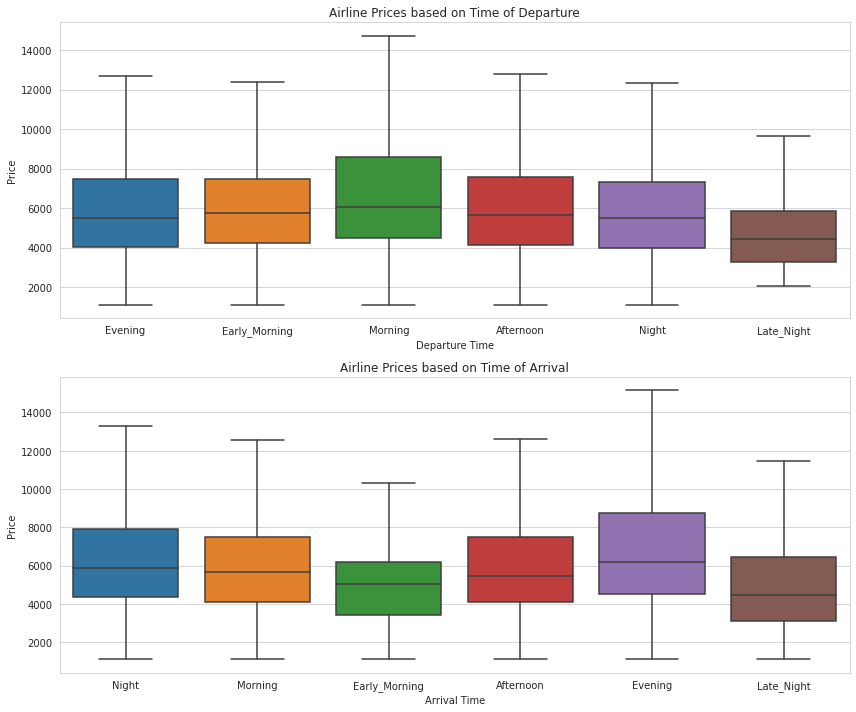

In [ ]:
fig = plt.figure(figsize=(12, 10)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 

df_eco = df.loc[df['class'] == 'Economy']

ax0 = plt.subplot(gs[0])
plot1 = sns.boxplot(data=df_eco, y="price", x="departure_time", showfliers = False)
plot1.set_title("Airline Prices based on Time of Departure")
plot1.set(xlabel = "Departure Time", ylabel = "Price")

ax1 = plt.subplot(gs[1])
plot2 = sns.boxplot(data=df_eco, y="price", x="arrival_time", showfliers = False)
plot2.set_title("Airline Prices based on Time of Arrival")
plot2.set(xlabel = "Arrival Time", ylabel = "Price")

plt.tight_layout()

**Insights**

**Variation in Prices based on Time of Arrival/Departure** 

As expected, flights departing late into the night and arriving late into the night are priced cheaper than other flights.

Text(0.5, 0.98, 'Airline Prices based on the No. of Stops (Economy & Business)')

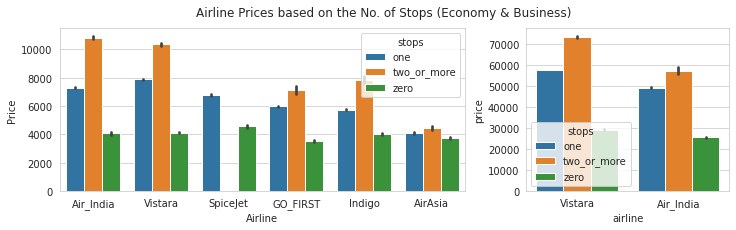

In [ ]:
fig = plt.figure(figsize=(12, 3)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 

ax0 = plt.subplot(gs[0])
plot1 = sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False))
# plot1.set_title("Airline Prices based on the No. of Stops (Economy)")
plot1.set(xlabel="Airline", ylabel="Price")

ax1 = plt.subplot(gs[1])
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False))
# plot2.set_title("Airline Prices based on the No. of Stops (Business)")
plot1.set(xlabel="Airline", ylabel="Price")

fig.suptitle("Airline Prices based on the No. of Stops (Economy & Business)")

**Insights**

The more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant. From all the analysis performed till now we can say AirAsia tends to show that it relates to a low cost company and Vistara and Air India tends to show that it relates to a high cost company.